In [1]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt


In [8]:
# Get data
symbol = "BTCUSDT"
timeFrame = "1h"
startDate = "2022-05-01"
endDate = "2022-08-28"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,37630.80,37806.79,37500.00,37680.67,2313.83572,2022-05-01 00:00:00
1,37680.66,38077.10,37386.38,37937.07,2622.65157,2022-05-01 01:00:00
2,37937.07,38053.68,37771.81,37817.79,1081.24561,2022-05-01 02:00:00
3,37817.78,38064.39,37801.52,38041.44,966.53850,2022-05-01 03:00:00
4,38041.44,38063.41,37885.30,37948.39,1405.77554,2022-05-01 04:00:00
...,...,...,...,...,...,...
2852,20018.00,20040.40,19941.83,20007.99,4374.04918,2022-08-27 20:00:00
2853,20007.99,20029.84,19870.01,19873.06,2779.32428,2022-08-27 21:00:00
2854,19874.25,20103.57,19858.43,20020.08,8501.92653,2022-08-27 22:00:00
2855,20021.35,20087.65,19992.55,20037.60,5025.54765,2022-08-27 23:00:00


In [9]:
# SMA strategy
sma_parameters = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.1,                                     ## float
    "long_period": 100,                               ## long period of SMA curve
    "short_period": 30,                               ## short period of SMA curve
    "trading_logistic":"both",                       ## "long", "short", "both"
    "trading_unit": "all_in"                      ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

# Buy and hold
buy_and_hold_parameters = {
    "name":"buy and hold",                            ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.0001,                                  ## float
}
buy_and_hodl = Strategies.Buy_and_Hold(buy_and_hold_parameters)

32 32


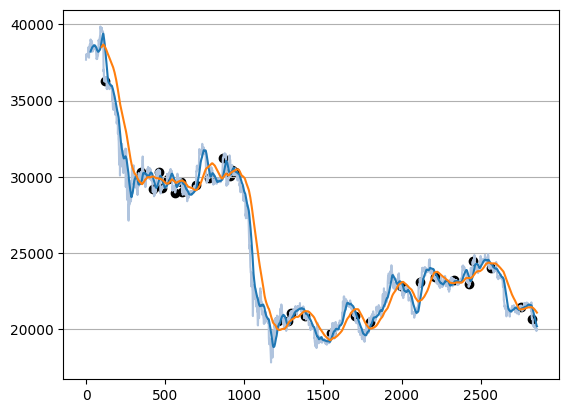

*--------------------------------*
strategy: SMA
trading count: 31
profit: 23.3090002091335
MDD: 0.30345827961584715


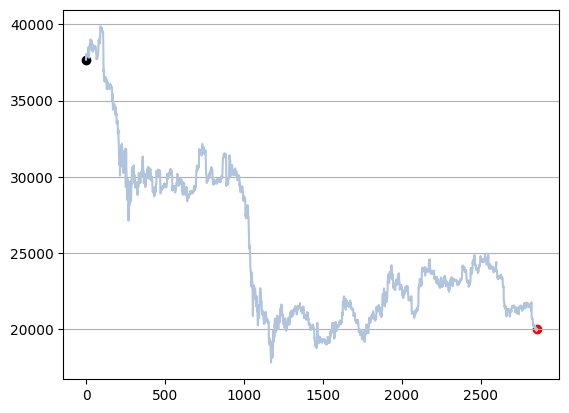

*--------------------------------*
strategy: buy and hold
trading count: 2
profit: -46.87288072536327
MDD: 0.5532024961853242


In [10]:
# sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
# print("*--------------------------------*")
# print("strategy:", sma.name)
# print("expected return:", expected_return * 100)
# print("sharpe ratio:", sharpe_ratio)
# sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=10000, window_off=1000)
# print("*--------------------------------*")
# print("strategy:", buy_and_hodl.name)
# print("expected return:", expected_return * 100)
# print("sharpe ratio:", sharpe_ratio)
# print()

profit, trading_count, buy_record, sell_record, MDD = sma.back_test(df)
print("*--------------------------------*")
print("strategy:", sma.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)
profit, trading_count, buy_record, sell_record, MDD = buy_and_hodl.back_test(df)
print("*--------------------------------*")
print("strategy:", buy_and_hodl.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)

# Brute force and find the best parameters

In [5]:
# SMA strategy
sma_parameters = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.001,                                   ## float
    "long_period": 100,                               ## long period of SMA curve
    "short_period": 30,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

In [6]:
index = 0
sharpe = []
expected = []
for long_period in range(50, 300):
    for short_period in range(5, 40):
        sma_parameters["long_period"] = long_period
        sma_parameters["short_period"] = short_period
        sma = Strategies.SMA(sma_parameters)

        sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
        # print("*--------------------------------*")
        # print("index:", index)
        # print("strategy:", sma.name)
        # print("long_period:", sma.long_period)
        # print("short_period:", sma.short_period)
        # print("expected return:", expected_return * 100)
        # print("sharpe ratio:", sharpe_ratio)
        sharpe.append(sharpe_ratio)
        expected.append(expected_return)
        index += 1

In [7]:
print(np.argmax(expected), np.argmax(sharpe))
expected_index = np.argmax(expected)
sharpe_index = np.argmax(sharpe)
print(np.max(expected) * 100)
print(np.max(sharpe))

43 315
268.4948582424389
2.2121028520573116


In [8]:
exp_l, exp_s = 0, 0
sha_l, sha_s = 0, 0
index = 0
l = 0
for long_period in range(50, 300):
    s = 0
    for short_period in range(5, 40):
        if (index == expected_index):
            exp_l, exp_s = long_period, short_period
            print("exp", exp_l, exp_s)
        if (index == sharpe_index):
            sha_l, sha_s = long_period, short_period
            print("sha", sha_l, sha_s)
        index += 1
        s += 1
    l += 1

exp 51 13
sha 59 5


In [9]:
# SMA strategy
sma_parameters = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.001,                                   ## float
    "long_period": exp_l,                               ## long period of SMA curve
    "short_period": exp_s,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

In [10]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", sma.name)
print("long_period:", sma.long_period)
print("short_period:", sma.short_period)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

*--------------------------------*
strategy: SMA
long_period: 51
short_period: 13
expected return: 268.4948582424389
sharpe ratio: 0.565012006171704


In [11]:
# SMA strategy
sma_parameters = {
    "name":"SMA",                                     ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.001,                                   ## float
    "long_period": sha_l,                               ## long period of SMA curve
    "short_period": sha_s,                               ## short period of SMA curve
    "trading_logistic":"both",                        ## "long", "short", "both"
    "trading_unit": "all_in"                          ## "all_in", "same_unit" or "same_money"
}
sma = Strategies.SMA(sma_parameters)

In [12]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(sma, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", sma.name)
print("long_period:", sma.long_period)
print("short_period:", sma.short_period)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

*--------------------------------*
strategy: SMA
long_period: 59
short_period: 5
expected return: 140.60952131262115
sharpe ratio: 2.2121028520573116


In [13]:
Expected_Return = np.array(expected)
Sharpe_Ratio = np.array(sharpe)
R = Expected_Return.reshape([250, 35])
S = Sharpe_Ratio.reshape([250, 35])

268.4948582424389


Text(0.5, 0, 'Expected Return (%)')

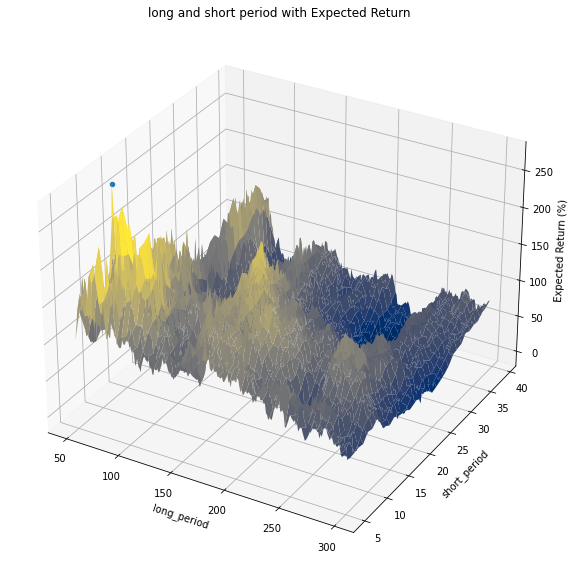

In [14]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
 
long_period = list(range(50, 300))
short_period = list(range(5, 40))
X, Y = np.meshgrid(long_period, short_period)

three_dim_R = R
Z = np.transpose(three_dim_R) * 100
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.scatter(exp_l, exp_s, np.max(Z))
ax.set_title('long and short period with Expected Return')
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel("long_period")
ax.set_ylabel("short_period")
ax.set_zlabel("Expected Return (%)")

2.2121028520573116


Text(0.5, 0, 'Sharpe Ratio')

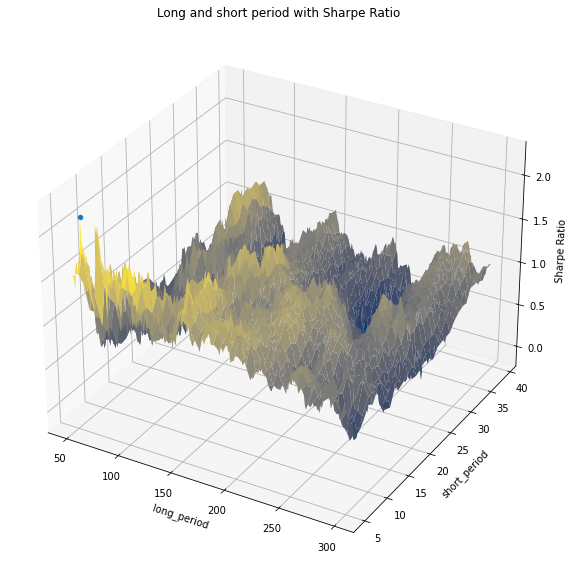

In [15]:
long_period = list(range(50, 300))
short_period = list(range(5, 40))
X, Y = np.meshgrid(long_period, short_period)

three_dim_R = S
Z = np.transpose(three_dim_R)
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.scatter(sha_l, sha_s, np.max(Z))
ax.set_title('Long and short period with Sharpe Ratio')
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel("long_period")
ax.set_ylabel("short_period")
ax.set_zlabel("Sharpe Ratio")